In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from scipy.optimize import curve_fit
from IPython.display import display, Markdown

# Constants
R_CONST = 8.314e-3  # defines the gas constant in KJ / mol·K

# Function
def clausius_clapeyron_relation(T, delta_H, c):
    """Function to represent the Clausius-Clapeyron relation."""
    # The Clausius-Clapeyron equation is used to describe the phase transition between two states of matter
    # Here, it is used to calculate the vapor pressure of a substance at a particular temperature
    return -delta_H/R_CONST/T + c  # c is a constant

# Plot settings
def plot_settings():
    """Function to handle plot settings"""
    plt.figure(figsize=(5,4),dpi=800)
    font = {'family': 'serif', 'size': 16}
    plt.rc('font', **font)
    #plt.rc('text', usetex=True)
    
plot_settings()

<Figure size 4000x3200 with 0 Axes>

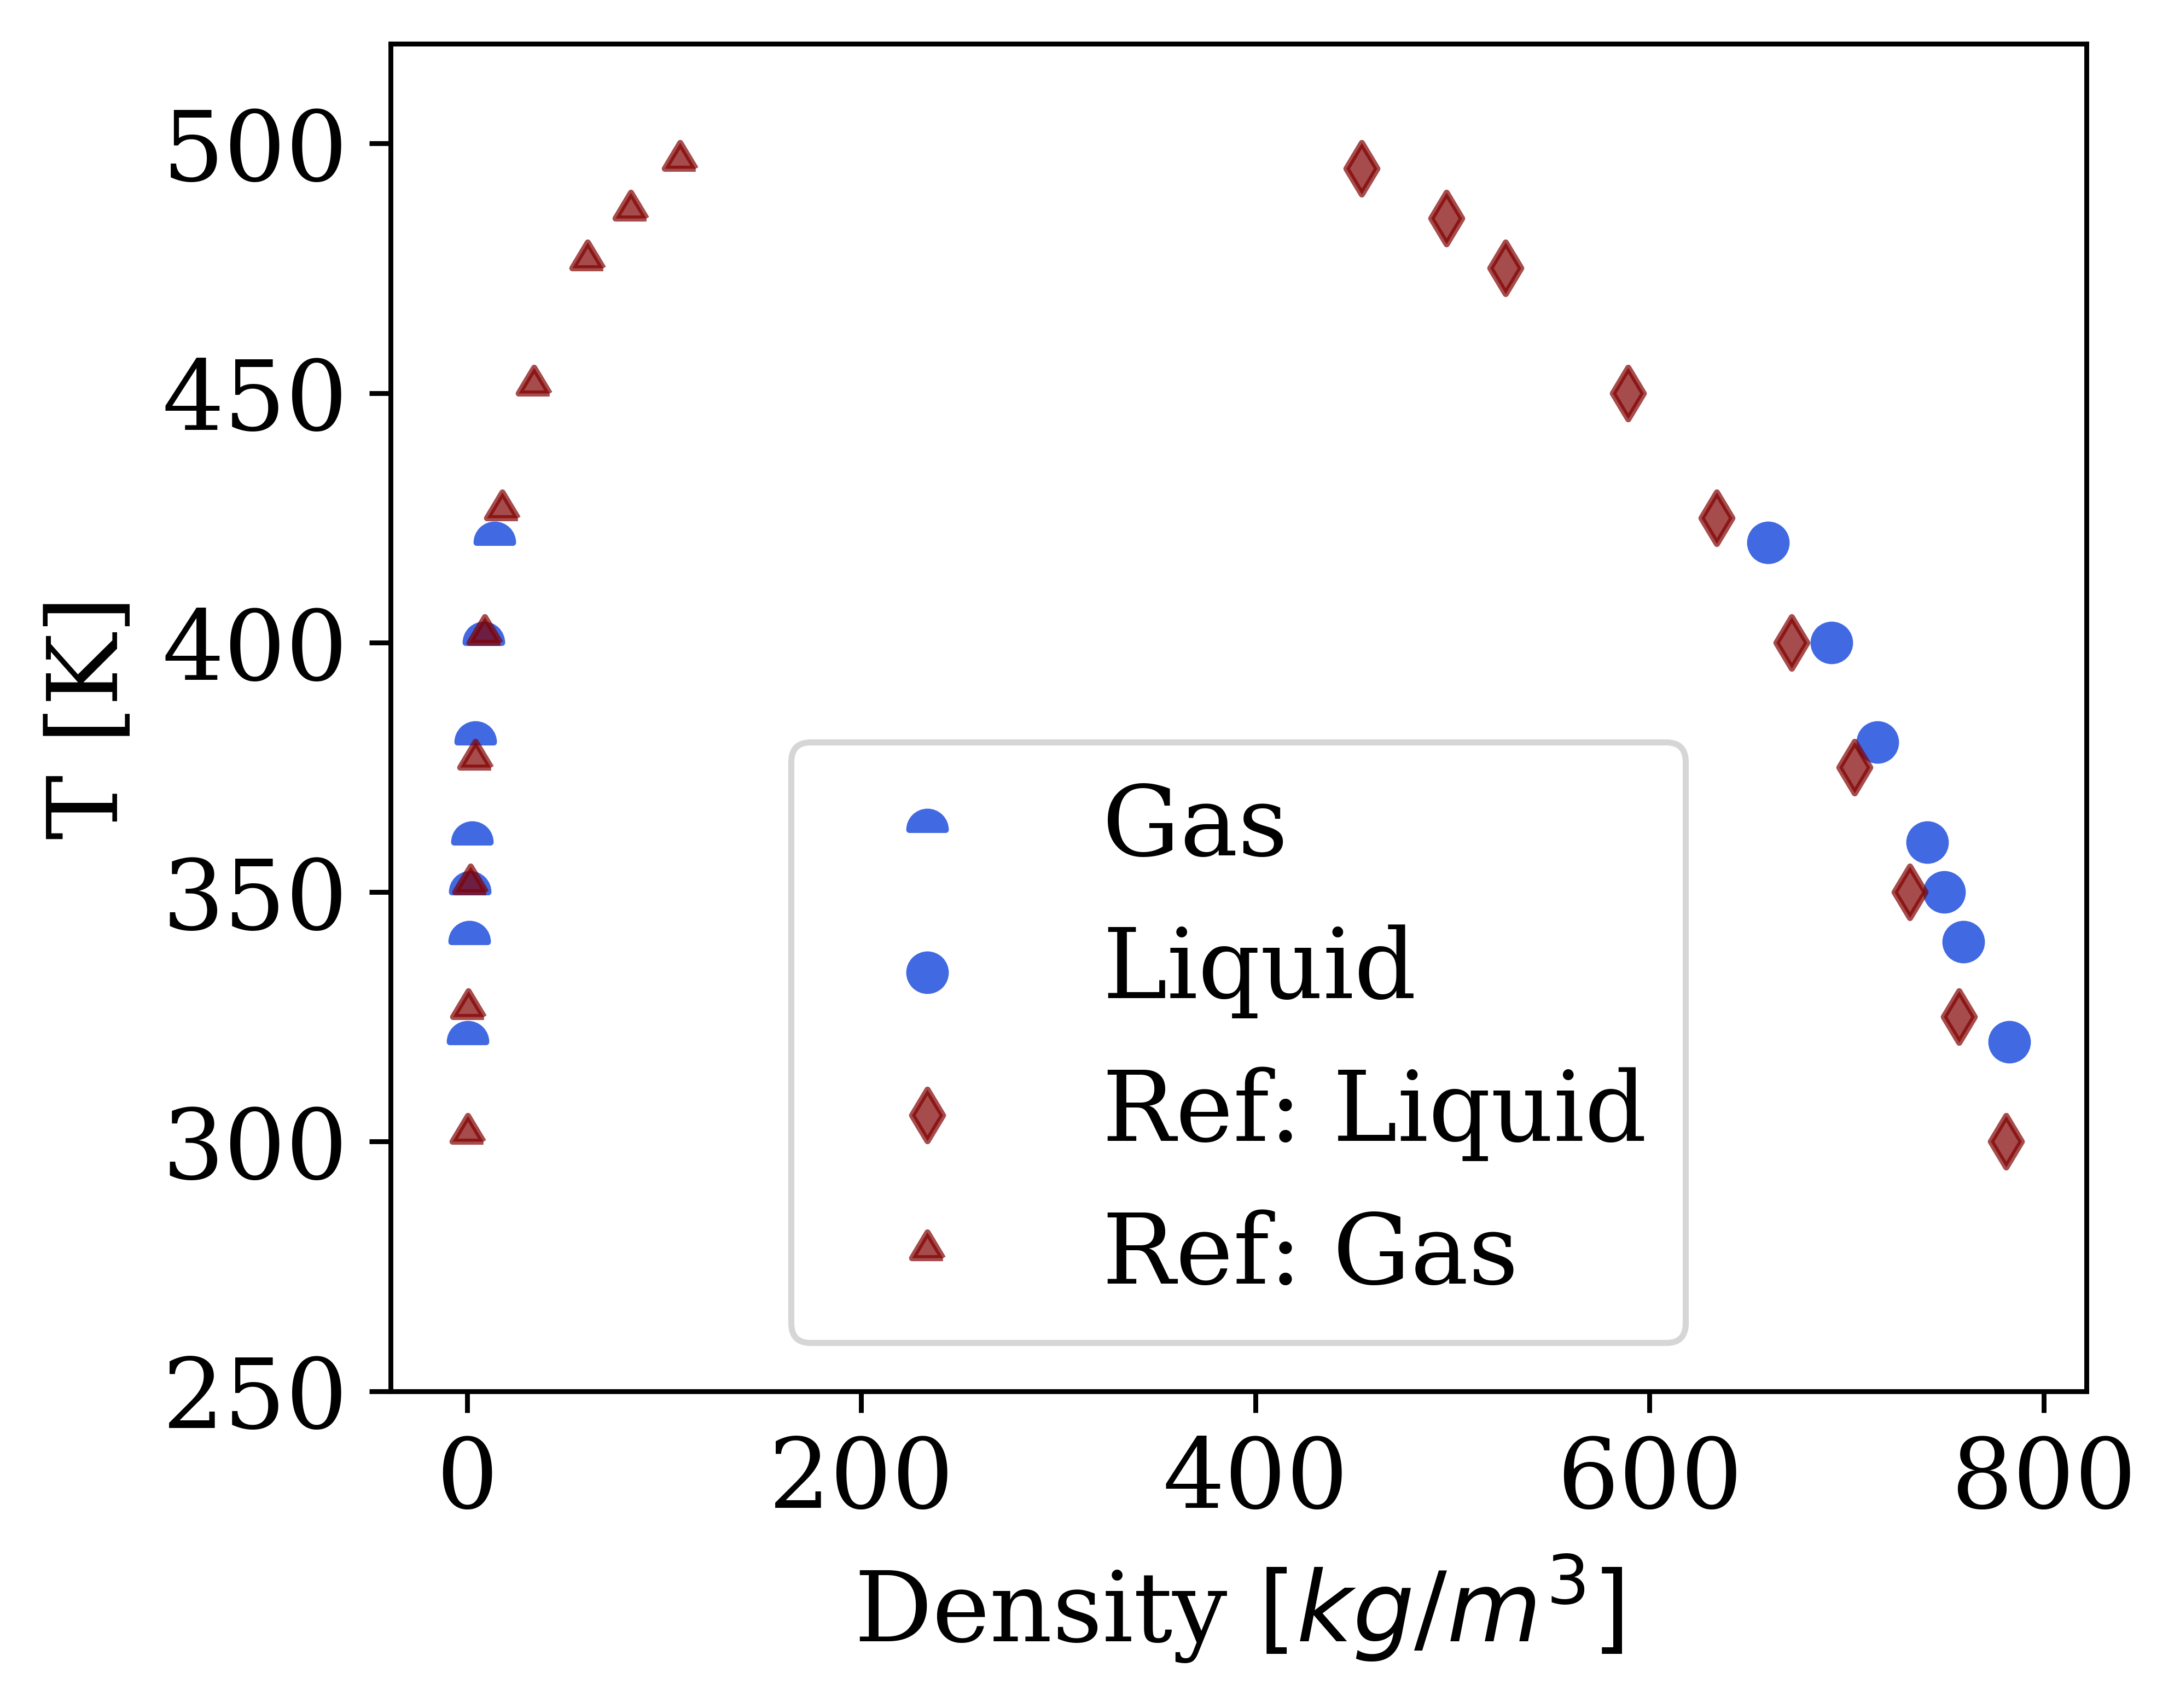

In [55]:
# Load data
data = np.loadtxt("eth_rho_T_MC.data")
T_list, Dl_list, Dg_list, Pg_list, Pg_err_list = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4] 

# Plot settings
plot_settings()

# Plot gas and liquid densities
plt.scatter(Dg_list, T_list, c="royalblue", marker=MarkerStyle('o', fillstyle='top'), label="Gas")
plt.scatter(Dl_list, T_list, c="royalblue", marker=MarkerStyle('o', fillstyle='full'), label="Liquid")
plt.ylim(250,520)

# Plot reference data
data_ref = np.loadtxt("ref_trappe.txt",skiprows=1)
plt.scatter(data_ref[:,1]*1e3, data_ref[:,0], marker="d", c="maroon",  alpha = 0.7, label="Ref: Liquid")
plt.scatter(data_ref[:,2]*1e3, data_ref[:,0], marker=MarkerStyle('d', fillstyle='top'), c="maroon",  alpha = 0.7, label="Ref: Gas")

# Label axis and show legend
plt.xlabel("Density $ [kg/m^3] $")
plt.ylabel("T [K]")
plt.legend()
plt.show()



Clausius–Clapeyron relation

$$\frac{\mathrm{d} P}{\mathrm{~d} T}=\frac{\Delta H_{\rm{vap}}}{T \Delta v}$$

The equation can be further simplified by making the assumption that the vapor phase behaves like an ideal gas, resulting in:
$$\ln P=-\frac{\Delta H_{\rm{vap}}}{R} \frac{1}{T}+c$$



    $\Delta H(cal)$: 41.144 $\pm$ 1.813  KJ/mol 
    $\Delta H(ref)$: 40.003 $\pm$ 0.440  KJ/mol 
    

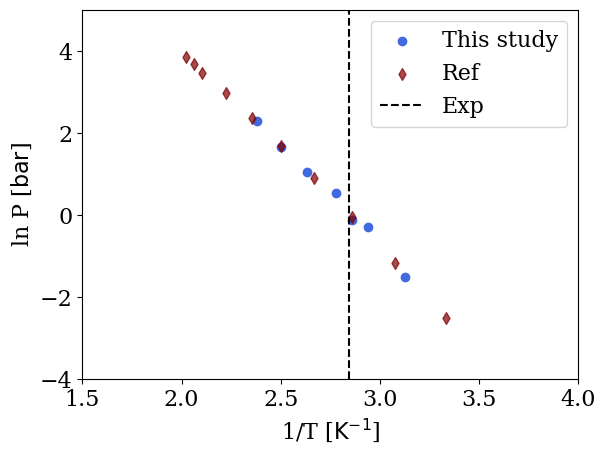

In [72]:
# scatter plots
plt.scatter(1000/T_list, np.log(Pg_list), c="royalblue", label="This study")
plt.scatter(1000/data_ref[:,0], np.log(data_ref[:,3]/100), alpha=0.7, marker="d", c="maroon", label="Ref")

# experimental reference
plt.axvline(x=1000/351.37, ls="--", color='black', label='Exp')

# plot limitations
plt.xlim(1.5, 4.0)
plt.ylim(-4, 5.0)

# labels for axes and legend
plt.ylabel(r"ln P [$\mathrm {bar} $]")
plt.xlabel(r"1/T [$\mathrm {K^{-1}} $]")
plt.legend()

# fitting Clausius_Clapeyron_relation to the data
popt, pcov = curve_fit(clausius_clapeyron_relation, T_list, np.log(Pg_list))
perr = np.sqrt(np.diag(pcov))

popt_ref, pcov_ref = curve_fit(clausius_clapeyron_relation, data_ref[:,0], np.log(data_ref[:,3]/100))
perr_ref = np.sqrt(np.diag(pcov_ref))

# displaying the fitted parameters
display(Markdown(
    rf"""
    $\Delta H(cal)$: {popt[0]:.3f} $\pm$ {np.sqrt(np.diag(pcov))[0]:.3f}  KJ/mol 
    $\Delta H(ref)$: {popt_ref[0]:.3f} $\pm$ {np.sqrt(np.diag(pcov_ref))[0]:.3f}  KJ/mol 
    """))


Determine the boiling temperature at 1 bar
$$ {T_{\rm b}} = \frac{\Delta H_{\rm{vap}}}{c*R}  $$


In [73]:
Tb_ref = popt_ref[0]/(R_CONST*popt_ref[1])

display(Markdown(
    rf"""
    Boiling point at 1 bar:
    Ref: {Tb_ref:.2f} K
    Exp: 351.37 K
    """))


    Boiling point at 1 bar:
    Ref: 352.78 K
    Exp: 351.37 K
    

In [74]:
import numpy as np
from scipy.optimize import curve_fit


# actual data
xdata = T_list
ydata = Pg_list
yerr = Pg_err_list  # uncertainties in ydata

# number of synthetic datasets to create
N = 100000

# storage for fit parameters
fit_params = np.zeros((N, 3))

for i in range(N):
    # create a synthetic dataset
    ydata_synthetic = np.log(ydata + yerr * np.random.randn(len(ydata)))

    # fit to the synthetic dataset
    popt, pcov = curve_fit(clausius_clapeyron_relation, xdata, ydata_synthetic)

    par = np.append(popt, popt[0]/(popt[1]*R_CONST))
    # store the fit parameters
    fit_params[i] = par

# analyze the distribution of fit parameters
fit_params_mean = fit_params.mean(axis=0)
fit_params_std = fit_params.std(axis=0)

print("Mean fit parameters: ", fit_params_mean)
print("Uncertainty in the fit parameters: ", fit_params_std)

T_b = fit_params_mean[-1]
T_b_error = fit_params_std[-1]


Mean fit parameters:  [ 41.16778755  14.10172137 351.12672314]
Uncertainty in the fit parameters:  [1.00371591 0.32665076 0.75978311]



    Boiling point at 1 bar:
    This study: 351.13 $\pm$  0.7597831052618211 K
    Ref: 352.78 K
    Exp: 351.37 K
    

In [75]:
display(Markdown(
    rf"""
    Boiling point of ethanol at 1 bar:
    This study: {T_b:.2f} $\pm$  {T_b_error} K
    Ref: {Tb_ref:.2f} K
    Exp: 351.37 K
    """))


    Boiling point at 1 bar:
    This study: 351.13 $\pm$  0.7597831052618211 K
    Ref: 352.78 K
    Exp: 351.37 K
    